In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import *
from nltk.corpus import stopwords
from nltk.sentiment.vader import *
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
reviews = [
    "I absolutely love Spotify! It's my go-to music streaming platform. The user interface is sleek and easy to navigate, and the personalized playlists and recommendations are spot on.",
    "Spotify has completely changed the way I listen to music. The vast library of songs and podcasts ensures that I never run out of things to listen to. Plus, the ability to create and share playlists with friends is fantastic.",
    "I've been using Spotify for years now, and I have to say, it just keeps getting better. The curated playlists for different moods and occasions are a game-changer, and I love discovering new artists through the 'Discover Weekly' playlist.",
    "As a music lover, Spotify is like a dream come true for me. I can access millions of songs from all genres, anytime, anywhere. The sound quality is top-notch, and I appreciate the frequent updates and improvements to the app.",
    "Spotify Premium is worth every penny! I can listen to music offline, ad-free, and in high quality. The ability to download my favorite songs and playlists for offline listening is a game-changer, especially when I'm traveling or have limited data.",
    "I've tried other music streaming services, but none compare to Spotify. The curated playlists, personalized recommendations, and seamless integration across devices make it my number one choice for listening to music.",
    "Spotify's family plan is a lifesaver for my household. We can all have our individual accounts under one subscription, which saves us money and ensures that everyone gets to enjoy their favorite music without any ads interrupting.",
    "I'm a huge fan of Spotify's podcast selection. They have a wide range of topics and genres to choose from, and the ability to download episodes for offline listening is a game-changer for my daily commute.",
    "The only downside to Spotify is that sometimes the algorithm gets it wrong with its recommendations. However, the ability to manually search for artists and songs balances it out for me. Overall, I'm very satisfied with the service.",
    "I've been a loyal Spotify user since its early days, and I have no intention of switching to another platform. The constant updates and improvements show that they're committed to providing the best possible experience for their users."
]

reviews.extend([
    "Spotify's collaborative playlists feature is fantastic! It's so much fun to create playlists with friends for parties or road trips. It adds a whole new level of social interaction to the platform.",
    "I love how Spotify keeps track of my listening habits and creates personalized year-in-review playlists. It's like a musical journey through the past year, and it always brings back great memories.",
    "The free version of Spotify is great for occasional listening, but I highly recommend upgrading to Premium for the full experience. The ads can be a bit annoying, but the benefits far outweigh the cost.",
    "Spotify's integration with other apps and devices makes it incredibly convenient to use. Whether I'm listening on my phone, computer, or smart speaker, my music is always just a few clicks away.",
    "One of the things I appreciate most about Spotify is its commitment to supporting independent artists. Their playlists feature a diverse range of music, and it's a great way to discover hidden gems.",
    "I recently started using Spotify for studying, and it's been a game-changer. The 'Focus' playlists help me stay productive and focused for hours on end, without getting distracted.",
    "Spotify's 'Behind the Lyrics' feature adds a whole new dimension to the listening experience. It's fascinating to learn about the meaning behind the songs and the stories behind the artists.",
    "I've been using Spotify to learn new languages through music, and it's been incredibly effective. The 'Language Learning' playlists make it fun and easy to immerse myself in different languages and cultures.",
    "I appreciate Spotify's commitment to accessibility. The app is user-friendly and customizable, making it easy for people of all ages and abilities to enjoy their favorite music.",
    "Spotify's customer support team is top-notch. Whenever I've had an issue or question, they've been quick to respond and resolve the problem. It's nice to know that they're always there to help.",
    "I love how Spotify celebrates diversity and inclusivity through its playlists and initiatives. Whether it's Women's History Month or Pride Month, they always curate amazing playlists that highlight diverse voices and perspectives."
])

#preprocess text
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def preprocess_text(text):
  tokens=word_tokenize(text.lower())
  tokens=[token for token in tokens if token.isalnum()]
  tokens=[token for token in tokens if token not in stop_words]
  tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return tokens

In [ ]:
#sentiment analyzer
sid=SentimentIntensityAnalyzer()

#initialize lists
sentiment_scores,key_phrases=[],[]
for review in reviews:
  tokens=preprocess_text(review)
  sentiment_score=sid.polarity_scores(' '.join(tokens))['compound']
  sentiment_percentage=(sentiment_score+1)*50
  sentiment_scores.append(sentiment_percentage)
  sentences=sent_tokenize(review)
  for sentence in sentences:
    key_phrases.extend(preprocess_text(sentence))

In [ ]:
#avg sentiment score
avg_sentiment_score=sum(sentiment_scores)/len(sentiment_scores)
print("Avg sentiment score= ",avg_sentiment_score,"%")

#key phrases
print("Key Phrases: ",', '.join(set(key_phrases)))

Avg sentiment score=  86.61571428571428 %
Key Phrases:  appreciate, absolutely, completely, issue, downside, since, huge, road, productive, resolve, memory, story, far, million, phone, sound, personalized, every, run, one, penny, ability, daily, data, great, level, outweigh, favorite, accessibility, anytime, like, version, hidden, behind, service, know, convenient, subscription, smart, improvement, topic, weekly, wide, commute, balance, providing, best, lyric, lover, navigate, new, recommendation, interaction, meaning, download, episode, say, trip, intention, question, customizable, number, musical, lifesaver, satisfied, free, team, get, selection, woman, studying, platform, across, people, diversity, make, ensures, choice, share, much, however, recommend, hour, vast, perspective, changed, genre, access, high, occasion, cost, whether, incredibly, easy, listen, premium, create, past, history, computer, whole, feature, love, committed, curate, focused, curated, come, app, anywhere, fan, 

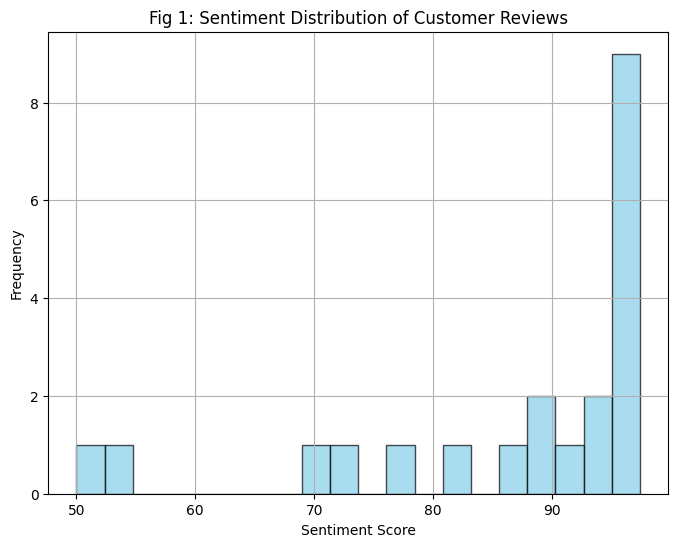

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(sentiment_scores,bins=20,color='skyblue',edgecolor='black',alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Fig 1: Sentiment Distribution of Customer Reviews")
plt.grid(True)
plt.show()

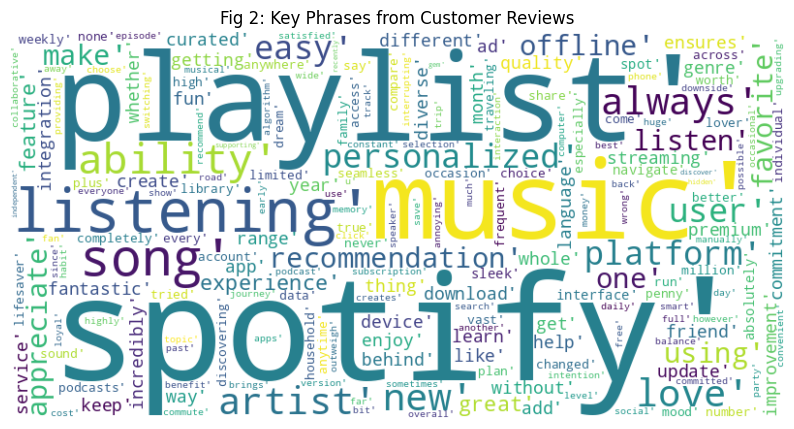

In [ ]:
#word cloud
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(str(key_phrases))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Fig 2: Key Phrases from Customer Reviews')
plt.axis('off')
plt.show()